# Lecture 10
### Linear Regression using numpy (with pandas and pyplot)
Notebook created by Jennifer Widom, modified by Lisa Wang.

Similar to what we did last lecture, this time with pandas. 

In [15]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Read Cities.csv into dataframe
f = open('Cities.csv','rU')
cities = pd.read_csv(f)

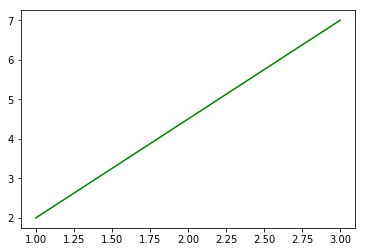

In [17]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

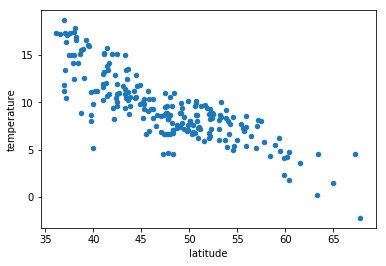

In [18]:
# Recall latitude versus temperature scatterplot
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

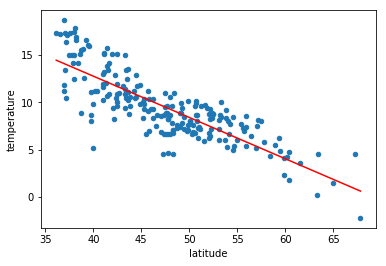

In [19]:
# Add linear regression
cities.plot.scatter(x='latitude', y='temperature')
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
x1 = min(cities.latitude)
x2 = max(cities.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()
# Beautify using plt.xlim(x1,x2)

In [20]:
# Correlation coefficients (r values)
cc = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print 'Correlation coefficient for latitude versus temperature:', cc
cc = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print 'Correlation coefficient for longitude versus temperature:', cc

Correlation coefficient for latitude versus temperature: -0.824104632027
Correlation coefficient for longitude versus temperature: -0.169307504036


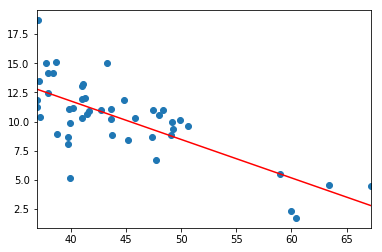

In [21]:
# Use linear regression for interactive temperature predictor
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')]
# Compute and show regression
plt.scatter(train.latitude, train.temperature)
a,b = np.polyfit(train.latitude, train.temperature, 1)
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()


In [22]:
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = raw_input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities.city == name]
    if len(city) == 0:
        print 'City not in dataset'
    else:
        # Use float() to convert dataframe element to value
        print 'Predicted temperature:', a * float(city.latitude) + b
        print 'Actual temperature:', float(city.temperature)

Enter city name (or "quit" to quit): Berlin
Predicted temperature: 7.63253316996
Actual temperature: 8.72
Enter city name (or "quit" to quit): quit


### <font color="green">Your Turn: World Cup Data</font>

In [23]:
# Read Players.csv into dataframe
f = open('Players.csv','rU')
players = pd.read_csv(f)

In [24]:
print players[:10]

     surname     team    position  minutes  shots  passes  tackles  saves
0     Abdoun  Algeria  midfielder       16      0       6        0      0
1    Belhadj  Algeria    defender      270      1     146        8      0
2  Boudebouz  Algeria  midfielder       74      3      28        1      0
3  Bougherra  Algeria    defender      270      1      89       11      0
4   Chaouchi  Algeria  goalkeeper       90      0      17        0      2
5   Djebbour  Algeria     forward      123      3      19        1      0
6    Ghezzal  Algeria     forward       40      3       8        0      0
7  Guedioura  Algeria  midfielder       38      0      18        1      0
8   Halliche  Algeria    defender      270      2      94        4      0
9      Kadir  Algeria  midfielder      262      0     104        3      0


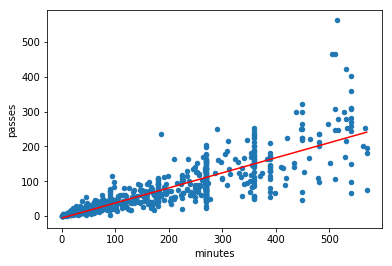

In [25]:
# From the players data, compute and plot a linear regression for
# minutes played (x-axis) versus passes made (y-axis).
# Reminder: copy-paste-modify approach to programming!
players.plot.scatter(x='minutes', y='passes')
a,b = np.polyfit(players.minutes, players.passes, 1) # Regression line is y = ax + b
x1 = min(players.minutes)
x2 = max(players.minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [26]:
# Show the correlation coefficient for the minutes-passes regression.
# Also show correlation coefficients for minutes played versus
# tackles, minutes played versus shots, and minutes played versus saves

In [27]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal

In [28]:
# SUPER BONUS!!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string